# Content Based Filtering


# **Install Library**

In [2]:
!pip install tensorflowjs

# **Import Library**

In [3]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


# **Data Loading**

In [4]:
#Import Data Selected Article from preprocessing before
articles = pd.read_csv('https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Articles%20Selected.csv')
articles

,article_id,authors,author_full_name,title,year,source_title,cited_by,abstract,references,language,index_keywords
0,0,Schulman J.; Levine S.; Moritz P.; Jordan M.; ...,"Schulman, John (55921038800); Levine, Sergey (...",Trust region policy optimization,2015,32nd International Conference on Machine Learn...,3732,"In this article, we describe a method for opti...","Bagnell J.A., Schneider J., Covariant policy s...",English,Approximation algorithms; Artificial intellige...
1,1,Hutto C.J.; Gilbert E.,"Hutto, C.J. (55394634800); Gilbert, Eric (1551...",VADER: A parsimonious rule-based model for sen...,2014,Proceedings of the 8th International Conferenc...,2965,The inherent nature of social media content po...,"Agarwal A., Xie B., Vovsha I., Rambow O., Pass...",English,Artificial intelligence; Data mining; Social n...
2,2,Kohavi R.,"Kohavi, Ron (56355116300)",A Study of Cross-Validation and Bootstrap for ...,1995,IJCAI International Joint Conference on Artifi...,8922,We review accuracy estimation methods and comp...,"Bailey T L, Elkan C, Estimating the at curacy ...",English,Classification (of information); Accuracy esti...
3,3,Brendan McMahan H.; Moore E.; Ramage D.; Hamps...,"Brendan McMahan, H. (6506837280); Moore, Eider...",Communication-efficient learning of deep netwo...,2017,Proceedings of the 20th International Conferen...,7471,Modern mobile devices have access to a wealth ...,"Abadi M., Chu A., Goodfellow I., McMahan B., M...",English,Artificial intelligence; Character recognition...
4,4,Sheikh H.R.; Bovik A.C.,"Sheikh, Hamid Rahim (7006576714); Bovik, Alan ...",Image information and visual quality,2006,IEEE Transactions on Image Processing,3235,Measurement of visual quality is of fundamenta...,"Sheikh H.R., Bovik A.C., de Veciana G., An inf...",English,Algorithms; Artificial Intelligence; Biomimeti...
...,...,...,...,...,...,...,...,...,...,...,...
2763,2983,Manchester R.A.,"Manchester, Ralph A. (7004270803)",Progress in performing arts medicine,2010,Medical Problems of Performing Artists,3,[No abstract available],"Milestones in NLM History, (2006); Fact Sheet ...",English,Abstracting and Indexing as Topic; Drama; Holi...
2764,2986,Machková M.,"Machková, Markéta (58076196300)",Enacting Inner Speech on the Academic Stage. A...,2023,Integrative Psychological and Behavioral Science,2,The recently published Springer Brief in cultu...,"Alderson-Day B., Fernyhough C., Inner speech: ...",English,Emotions; Humans; Speech; article; attention; ...
2765,2987,Graham M.E.; Fabricius A.,"Graham, Megan E. (56749349300); Fabricius, And...",Against environmental anaesthesia: investigati...,2021,Arts and Health,3,Secure long-term care units come with a unique...,"Borgen L., Guldahl A.S., Great-granny’s garden...",English,Aged; Art Therapy; Behavior Therapy; Dementia;...
2766,2993,Harrison D.,"Harrison, Dew (26649438400)",Handbook of research on digital media and crea...,2015,Handbook of Research on Digital Media and Crea...,2,Emerging technologies enable a wide variety of...,references,English,Digital storage; Art and cultures; Creative Te...


In [5]:
#Import Data Dummy Ratings
ratings = pd.read_csv("https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Ratings.csv")
ratings

,user_id,article_id,article_rating
0,736,111,1
1,118,1265,10
2,1946,2075,6
3,1649,2138,7
4,930,1176,8
...,...,...,...
9995,824,2517,4
9996,2140,122,2
9997,1927,111,2
9998,1951,736,4


In [6]:
#Import Data Dummy Users
users = pd.read_csv("https://raw.githubusercontent.com/capstone-bangkidss/Scholarseeks-ML/main/Dataset/Users.csv")
users

,user_id,name
0,641,Megan Robinson
1,1543,Angelica Butler
2,147,Veronica Sharp
3,3469,Michael Robinson
4,1248,David Hampton
...,...,...
4995,3132,Brenda Roberts
4996,3915,Cassandra Garcia
4997,3163,Victor Garcia
4998,4791,Jeffrey Kennedy


In [7]:
users_set = set(users['user_id'])
ratings_set = set(ratings['user_id'])

# Find user_ids that are in users but not in ratings
users_not_in_ratings = users_set - ratings_set

print("Users not in ratings:")
print(users_not_in_ratings)

Users not in ratings:
{0, 2813, 2817, 2818, 2824, 2828, 2838, 2849, 2850, 2851, 2855, 2859, 2874, 2893, 2896, 2907, 2908, 2911, 2912, 2913, 2923, 2933, 2935, 2938, 2942, 2954, 2957, 2960, 2961, 2964, 2982, 2988, 2994, 3001, 3002, 3003, 3004, 3005, 3006, 3007, 3008, 3009, 3010, 3011, 3012, 3013, 3014, 3015, 3016, 3017, 3018, 3019, 3020, 3021, 3022, 3023, 3024, 3025, 3026, 3027, 3028, 3029, 3030, 3031, 3032, 3033, 3034, 3035, 3036, 3037, 3038, 3039, 3040, 3041, 3042, 3043, 3044, 3045, 3046, 3047, 3048, 3049, 3050, 3051, 3052, 3053, 3054, 3055, 3056, 3057, 3058, 3059, 3060, 3061, 3062, 3063, 3064, 3065, 3066, 3067, 3068, 3069, 3070, 3071, 3072, 3073, 3074, 3075, 3076, 3077, 3078, 3079, 3080, 3081, 3082, 3083, 3084, 3085, 3086, 3087, 3088, 3089, 3090, 3091, 3092, 3093, 3094, 3095, 3096, 3097, 3098, 3099, 3100, 3101, 3102, 3103, 3104, 3105, 3106, 3107, 3108, 3109, 3110, 3111, 3112, 3113, 3114, 3115, 3116, 3117, 3118, 3119, 3120, 3121, 3122, 3123, 3124, 3125, 3126, 3127, 3128, 3129, 3130, 31

# **Merge and Find Duplicated Data**

In [8]:
#Merge Dataset Ratings with Article to get all information about what paper do user rate
articles_ratings = pd.merge(
    ratings, articles,
    on='article_id',
    how='inner',  # Ensure only matched entries are included
    suffixes=('_rating', '_info')  # Rename conflicting columns if any
)
articles_ratings.to_csv('articles_ratings.csv', index=False)
articles_ratings = pd.read_csv('articles_ratings.csv')
articles_ratings

,user_id,article_id,article_rating,authors,author_full_name,title,year,source_title,cited_by,abstract,references,language,index_keywords
0,736,111,1,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
1,520,111,2,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
2,1507,111,10,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
3,242,111,7,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
4,2189,111,2,Schwarz J.M.; Rödelsperger C.; Schuelke M.; Se...,"Schwarz, Jana Marie (26024465400); Rödelsperge...",MutationTaster evaluates disease-causing poten...,2010,Nature Methods,2298,[No abstract available],"Wheeler D.A., Et al., Nature, 452, pp. 872-876...",English,Artificial Intelligence; Base Sequence; Comput...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9857,1109,2101,8,Fontaine J.-P.; Pointurier F.; Blanchard X.; T...,"Fontaine, J.-P. (57196949332); Pointurier, F. ...",Atmospheric xenon radioactive isotope monitoring,2004,Journal of Environmental Radioactivity,239,The Comprehensive Nuclear Test Ban Treaty (CTB...,"Bolmsjo M.S., Persson B.R.R., Medical Physics,...",English,Atmospheric radioactivity; Cryogenics; Gamma r...
9858,1269,368,4,Burg K.J.L.; Porter S.; Kellam J.F.,"Burg, Karen J.L. (7006575549); Porter, Scott (...",Biomaterial developments for bone tissue engin...,2000,Biomaterials,1463,The development of bone tissue engineering is ...,"Brown K.L.B., Cruess R.L., Bone and cartilage ...",English,Bone; Ceramic materials; Proteins; biomaterial...
9859,2654,1581,9,Gardan J.,"Gardan, Julien (56590073000)",Additive manufacturing technologies: State of ...,2016,International Journal of Production Research,357,The rapid prototyping has been developed from ...,"Ahn S.-H., Montero M., Odell D., Roundy S., Wr...",English,Economics; Manufacture; Printing; Product desi...
9860,2803,1441,8,Liu W.-T.,"Liu, Wen-Tso (14029966400)",Nanoparticles and their biological and environ...,2006,Journal of Bioscience and Bioengineering,365,Nanoparticles exhibit unique physical properti...,"Penn S.G., He L., Natan M.J., Nanoparticles fo...",English,"Biosensing Techniques; Colony Count, Microbial..."


In [9]:
duplicates = articles_ratings[articles_ratings.duplicated()]

print("Duplicate rows in the dataset:")
print(duplicates)

Duplicate rows in the dataset:
Empty DataFrame
Columns: [user_id, article_id, article_rating, authors, author_full_name, title, year, source_title, cited_by, abstract, references, language, index_keywords]
Index: []


In [10]:
articles.isnull().sum()

article_id          0
authors             0
author_full_name    0
title               0
year                0
source_title        0
cited_by            0
abstract            0
references          0
language            0
index_keywords      0
dtype: int64

#**Modelling**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - loss: 0.7631 - val_loss: 0.7547
Epoch 2/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.7383 - val_loss: 0.7303
Epoch 3/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.7157 - val_loss: 0.7068
Epoch 4/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.6910 - val_loss: 0.6842
Epoch 5/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.6682 - val_loss: 0.6624
Epoch 6/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.6463 - val_loss: 0.6415
Epoch 7/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.6258 - val_loss: 0.6213
Epoch 8/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.6047 - val_loss: 0.6018
Epoch 9/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.5857 - val_loss: 0.5830
Epoch 10/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.5672 - val_loss: 0.5649
Epoch 11/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.5500 - val_loss: 0.5474
Epoch 12/100
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/ste

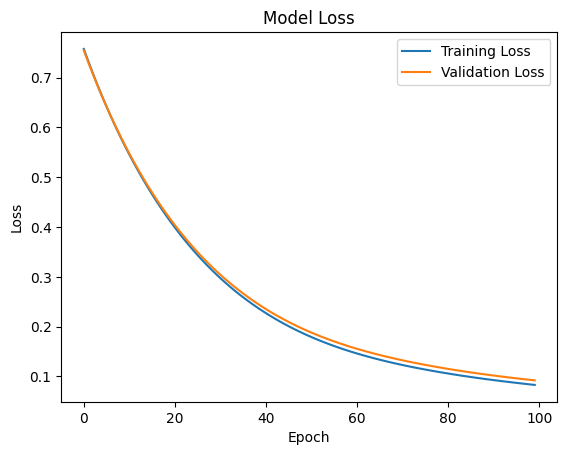

In [11]:
# Create TF-IDF matrix based on index_keywords from articles
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(articles['index_keywords'])

#Compute Cosine Similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to get article recommendations based on article id
def get_recommendations(article_id, cosine_sim=cosine_sim, top_n=10):
    idx = articles[articles['article_id'] == article_id].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n + 1]  # Get top_n similar articles
    article_indices = [i[0] for i in sim_scores]
    return articles.iloc[article_indices]

# Prepare user-article rating matrix
ratings_aggregated = ratings.groupby(['user_id', 'article_id']).agg({'article_rating': 'mean'}).reset_index()
user_article_matrix = ratings_aggregated.pivot(index='user_id', columns='article_id', values='article_rating').fillna(0)

# Map user_id to the index in the user_article_matrix
user_index_mapping = {user_id: idx for idx, user_id in enumerate(user_article_matrix.index)}

# Step 5: Split the data into training and validation sets
train_data, val_data = train_test_split(user_article_matrix.values, test_size=0.2, random_state=42)

# Get the input shape
input_shape = user_article_matrix.shape[1]

# Step 6: Define the model using tf.keras
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(input_shape, activation='linear'))

model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error')

# Train the model with validation data
history = model.fit(train_data, train_data, epochs=100, batch_size=32, validation_data=(val_data, val_data), verbose=1)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [12]:
#Function for Model
def recommend_articles_for_user(user_id, model, user_article_matrix, articles_ratings, user_index_mapping, articles, top_n=10):
    if user_id in user_index_mapping:
        # Existing user logic
        user_idx = user_index_mapping[user_id]
        user_vector = user_article_matrix[user_idx].reshape(1, -1)  # Ensure input shape matches model expectation
        predicted_ratings = model.predict(user_vector)
        recommended_articles_indices = np.argsort(predicted_ratings[0])[::-1]

        # Get articles rated by the user
        user_ratings = articles_ratings[articles_ratings['user_id'] == user_id]

        # Filter out articles already rated by the user
        rated_article_ids = user_ratings['article_id'].tolist()
        recommended_articles = articles[~articles['article_id'].isin(rated_article_ids)]

        # Sort recommended articles by predicted ratings
        recommended_articles = recommended_articles.iloc[recommended_articles_indices[:top_n]]

        # Sort recommended articles by 'cited_by' in descending order
        recommended_articles = recommended_articles.sort_values(by='cited_by', ascending=False)

        return recommended_articles.head(top_n)
    else:
        # New user logic
        user_vector = np.zeros((1, user_article_matrix.shape[1]))  # Use a zero vector for new users
        predicted_ratings = model.predict(user_vector)
        recommended_articles_indices = np.argsort(predicted_ratings[0])[::-1]

        recommended_articles = articles.iloc[recommended_articles_indices[:top_n]]

        # Sort recommended articles by 'cited_by' in descending order
        recommended_articles = recommended_articles.sort_values(by='cited_by', ascending=False)

        return recommended_articles.head(top_n)

In [13]:
#Load the Function
user_id = 2807
recommended_articles = recommend_articles_for_user(user_id, model, user_article_matrix.values, articles_ratings, user_index_mapping, articles, top_n=10)
print(recommended_articles[['article_id', 'title', 'abstract', 'cited_by']])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
      article_id                                              title  \
119          120  Deep learning models for plant disease detecti...   
1887        1899  Influence processes for information technology...   
361          365  Sequence-specific detection of individual DNA ...   
2537        2567  Clusters: Structure, energetics, and dynamics ...   
992         1000  Membrane fouling in membrane bioreactors for w...   
1520        1528  30 Years of functionally graded materials: An ...   
1782        1790  Structure and properties of expanding polyuret...   
1777        1785  The adoption process and impact of additive ma...   
2140        2167  Sulfur-Iodine plant for large scale hydrogen p...   
2276        2305  A real-time warning model for teamwork perform...   

                                               abstract  cited_by  
119   In this paper, convolutional neural network mo...      1704  
1887  This study examines how processes of e

In [14]:
#Check what articles have been rated by users for validation
user_id = 2807
rated_articles = articles_ratings[articles_ratings['user_id'] == user_id]
print(f"Artikel yang sudah dirating oleh user dengan user_id {user_id}:")
print(rated_articles[['article_id', 'article_rating']])

Artikel yang sudah dirating oleh user dengan user_id 2807:
      article_id  article_rating
1546         111               9
2143        2138               3
2217        1176               5
2225        1408               3
2359        2465              10
...          ...             ...
9680         449              10
9731        2293               3
9768         401              10
9809         138               6
9848         405               5

[149 rows x 2 columns]


In [15]:
#Check Users Who Frequently Rate Article
ratings['user_id'].value_counts()

user_id
2807    151
2476    146
1269    108
2169     61
826      58
       ... 
2083      1
1989      1
2446      1
35        1
907       1
Name: count, Length: 2968, dtype: int64

In [16]:
# Example call the function 'get_recommendations' to get similar articles with article_id
similar_articles = get_recommendations(19, cosine_sim=cosine_sim, top_n=10)
print(similar_articles[['article_id', 'title', 'abstract', 'cited_by']])

     article_id                                              title  \
53           53  Batch normalization: Accelerating deep network...   
90           91  Inception-v4, inception-ResNet and the impact ...   
26           26  Learning transferable features with deep adapt...   
15           15  Domain adaptation via transfer component analysis   
257         260  Learning from class-imbalanced data: Review of...   
136         137  Membership Inference Attacks Against Machine L...   
208         209  Learning to discover cross-domain relations wi...   
256         259  A Deep Learning Approach for Intrusion Detecti...   
109         110        A theory of learning from different domains   
25           25               Ensemble methods in machine learning   

                                              abstract  cited_by  
53   Training Deep Neural Networks is complicated b...     22048  
90   Very deep convolutional networks have been cen...      8199  
26   Recent studies reveal t

#**Save the Model**

In [17]:
from tensorflow.keras.models import load_model, save_model
from keras.models import load_model, save_model


In [18]:
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)


2.16.1
3.3.3


In [19]:
saved_model_path_h5 = "./ContentBasedFilteringModel.h5"
model.save(saved_model_path_h5)

In [ ]:
saved_model_path_keras = "./ContentBasedFilteringModel.keras"
model.save(saved_model_path_keras)

In [22]:
!tensorflowjs_converter --input_format=keras "./ContentBasedFilteringModel.h5" ./

2024-06-16 17:37:11.373232: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
failed to lookup keras version from the file,
    this is likely a weight only file


In [23]:
!zip submission.zip *.bin model.json

  adding: group1-shard1of1.bin (deflated 5%)
  adding: model.json (deflated 80%)
